In [1]:
import h2o
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_202"; Java(TM) SE Runtime Environment (build 1.8.0_202-b08); Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from /Users/bap00001/.pyenv/versions/3.7.6/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpwaccgdaf
  JVM stdout: /tmp/tmpwaccgdaf/h2o_root_started_from_python.out
  JVM stderr: /tmp/tmpwaccgdaf/h2o_root_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_root_iycqf9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.778 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
x = [z*0.01 for z in range(0, 1001)]

In [4]:
print( x[0:5] )
print( x[995:1001] )

[0.0, 0.01, 0.02, 0.03, 0.04]
[9.950000000000001, 9.96, 9.97, 9.98, 9.99, 10.0]


In [5]:
y = np.sin(x)
y = y + np.random.normal( 0, 0.1, len(x) )

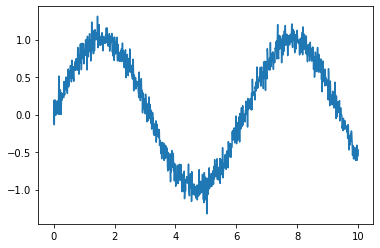

In [6]:
plt.plot(x, y)
plt.show()

In [7]:
sine_wave = pd.DataFrame({
    'a' : x,
    'b' : y
})

In [8]:
sine_wave_h2o = h2o.H2OFrame(
    sine_wave
    )

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
sine_wave_h2o.summary()

,a,b
type,real,real
mins,0.0,-1.324591295032431
mean,4.999999999999934,0.18587940829900151
maxs,10.0,1.3110218548530008
sigma,2.891081112663593,0.6719206246262884
zeros,1,0
missing,0,0
0,0.0,-0.09257348536630708
1,0.01,0.18679649666219988
2,0.02,-0.13618435111267382


In [10]:
# below code is neeeded if wish to give the data frame a "name."
sine_wave_h2o = h2o.H2OFrame(
    sine_wave,
    destination_frame = "sine_wave"
    )

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [11]:
# the output is pandas data frame.
sine_wave_h2o.as_data_frame()

,a,b
0,0.00,-0.092573
1,0.01,0.186796
2,0.02,-0.136184
3,0.03,0.132564
4,0.04,0.195782
...,...,...
996,9.96,-0.407984
997,9.97,-0.608134
998,9.98,-0.527278
999,9.99,-0.464847
